# <center> Predicting The Prices of American Cars

<img src='https://amcdn.blob.core.windows.net/media/1/root/car-price-tag.jpg' width='450'> 

# Problem Background:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, the company wants to understand which factors are affecting the pricing of cars in the American market, since those may be very different from the Chinese market. So the main objectives of this project or what are the company wants to know are:
##  Main Objectives :

* Which variables are significant in predicting the price of a car?
* How well those variables describe the price of a car?

## Business Goal :
In this project we are required to build a model of the price of cars with the available independent variables within dataset. This model will be used by the management team to understand how exactly the prices vary with the independent variables. With those data, they can manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the finished model will be a good way for management to understand the pricing dynamics of a new market(in this case is american market).


# Table of Contents:

1. [Part 1: Reading and Understanding the Data](#1)
1.  [Part 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Part 3: Data Visualization](#3)
    - Boxplot
    - Pairplot
1. [Part 4: Data Preparation](#4) 
   - Dummy Variable
1. [Part 5: Splitting the Data into Training and Testing Sets](#5)
   - Rescaling
1. [Part 6: Building a Linear Model](#6)
   - RFE
   - VIF
1. [Part 7: Residual Analysis of the train data](#7)
1. [Part 8: Making Predictions Using the Final Model](#8)
1. [Part 9: Model Evaluation](#8)
   - RMSE Score

# Part 1 : Reading and Understanding the Data <a id="1"></a> <br>

<img src='https://visme.co/blog/wp-content/uploads/2021/08/Data-Visualization-thumbnail.jpg' width='450'> 

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Local file path. Please change the file path accordingly

#path = '../car/car-price-prediction/'
#file = 'CarPrice_Assignment.csv'
#file1 = path +'Data Dictionary - carprices.xlsx'

In [3]:
# Reading the automobile consulting company file on which analysis needs to be done

dataset = pd.read_csv('CarPrice_Assignment.csv')

dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [4]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,four,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,six,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217,ohc,six,145,idi,3.0100,3.4000,23.0000,106,4800,26,27,22470.0000


In [5]:
# Reading the data dictionary file

df_stru = pd.read_excel('Data Dictionary - carprices.xlsx')
df_stru.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,DATA DICTONARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Understanding the dataframe

In [6]:
# shape of the data
dataset.shape

(205, 26)

In [7]:
# information of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
# description of the data
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


# Part 2: Data Cleaning <a id="2"></a> <br>

<img src='https://www.gpg-callcenter.com/wp-content/uploads/articol.jpeg' width='450'> 

The dataset which we use is about price of the cars and its factors. This dataset was released by Jeffrey C. Schlimmer. It is publicly available in the UCI Machine Learning repository, which can be accessed from here : 
* [Car Price Dataset](https://archive.ics.uci.edu/ml/datasets/Automobile)

Before we proceed further, we need to do some basic cleansing activity in order to feed our model the correct data.

In [9]:
# dropping car_ID based on business knowledge, we don't need the ID information

dataset = dataset.drop('car_ID',axis=1)

In [10]:
# Calculating the Missing Values % contribution in DF

df_null = dataset.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

symboling    0.0000
enginetype   0.0000
highwaympg   0.0000
citympg      0.0000
peakrpm      0.0000
dtype: float64

Looks like there are no missing values for this dataset

In [11]:
# Checking the Data types of the features
dataset.dtypes

symboling           int64  
CarName             object 
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
dtype: object

## Outlier Management

In [12]:
# Split The Numeric data into 2 so we can see the distribution clearly
data_outlier1 = dataset[['symboling','wheelbase','carlength','carwidth','curbweight','enginesize','citympg']]

In [13]:
data_outlier2 = dataset[['boreratio','stroke','compressionratio','horsepower','peakrpm','highwaympg']]

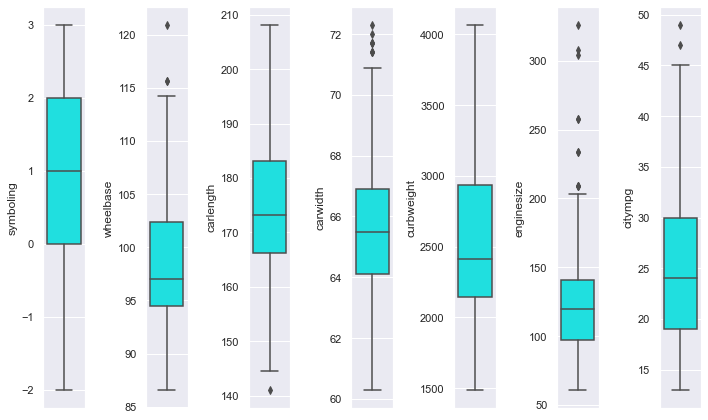

In [14]:
# Show the distribution of the features data part1
# adjust the figure size for better readability
plt.figure(figsize=(10,6))

# plotting
features1 = list(data_outlier1)
for i in range(0, len(features1)):
    plt.subplot(1, len(features1), i+1)
    sns.boxplot(y=data_outlier1[features1[i]], color='cyan')
    plt.tight_layout()

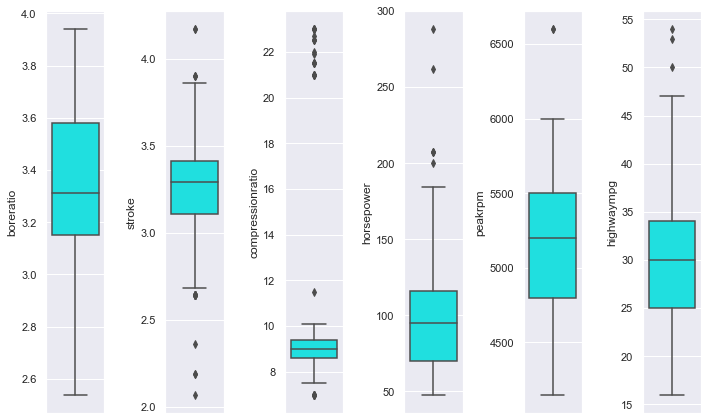

In [15]:
# Show the distribution of the features data part1
# adjust the figure size for better readability
plt.figure(figsize=(10,6))

# plotting
features2 = list(data_outlier2)
for i in range(0, len(features2)):
    plt.subplot(1, len(features2), i+1)
    sns.boxplot(y=data_outlier2[features2[i]], color='cyan')
    plt.tight_layout()

(205, 25)

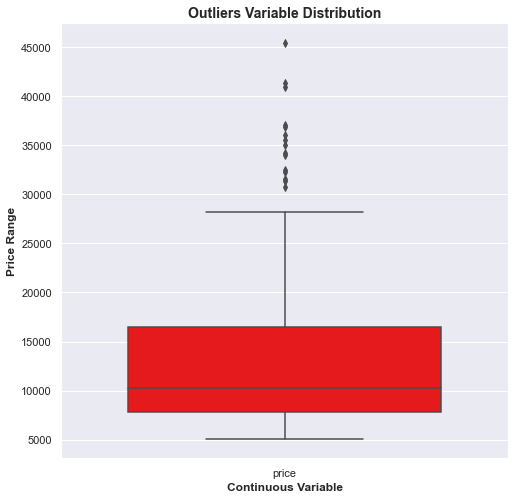

In [16]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7,color='green')
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
dataset.shape

 Insights: 
- There are quite features that have data outside the boxplot which can be termed as outliers but lets not remove it rather we will use standarization scaling.

## Creating and Transforming Data

If we look quick in `CarName` column there are mispelled of the car name, so we want to to check if there are mispelled from that feature.

### 2.1 Change The Typo in 'CarName' 

In [17]:
# Extracting Car Company from the CarName as per direction in Problem 

dataset['CarName'] = dataset['CarName'].str.split(' ',expand=True)

In [18]:
# Unique Car company

dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are misspelled car name which are maxda, nissan, porcshce, toyouta, vokswage and vw. These car name are not different, they just typo.

**Typo Error in Car Company name**
- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen = vw

In [19]:
# Renaming the typo errors in Car Company names

dataset['CarName'] = dataset['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

### 2.2 Change The Data Type of 'symboling' from Int64 to String

From the data description, `symboling` feature is actually categorical but in the dataset was numeric. So we will tranform it to string/categorical.

In [20]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

dataset['symboling'] = dataset['symboling'].astype(str)

### 2.3 Check The Duplicate Data

In [21]:
# checking for duplicates

dataset.loc[dataset.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Looks like there are no duplicated rows!

### 2,4 Separate The Numerical and Categorical Features

In [22]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = dataset.select_dtypes(include=['object']).columns
num_col = dataset.select_dtypes(exclude=['object']).columns
df_cat = dataset[cat_col]
df_num = dataset[num_col]

# Part 3: Data Visualization <a id="3"></a> <br>

<img src='https://i.pcmag.com/imagery/articles/02Xkt5sp3fVl5rGUtk3DXMi-7.fit_lim.v1569485349.jpg' width='450'> 

 Here we will identify if some predictors directly have a strong association with the outcome variable `price`.

## 3.1 Visualize The Most Popular Car and Less Popular car

Text(0, 0.5, 'Count of Cars')

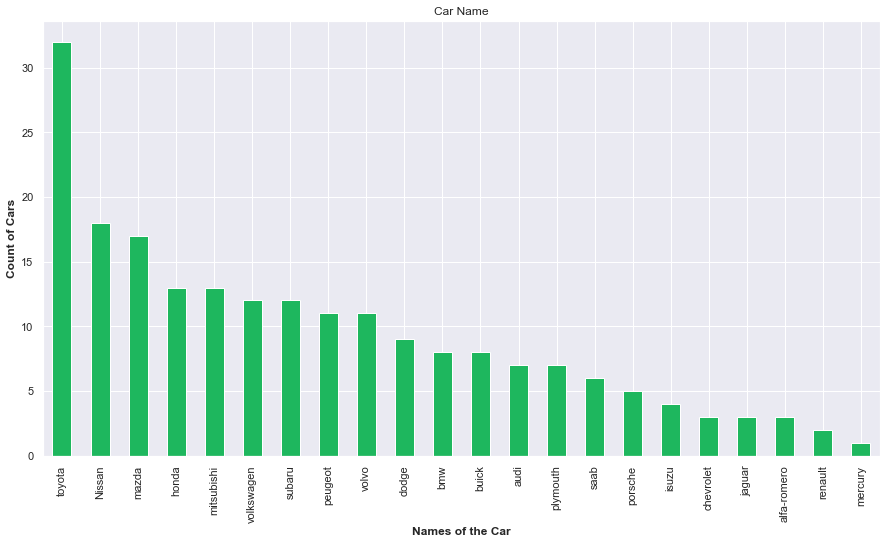

In [23]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=dataset['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1',orientation='vertical',color='#1EB75E')
ax.title.set_text('Car Name')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')


### Insights:
- Toyota seems to be the most popular cars.
- Mercury seems to be the least popular cars.

## 3.2 Visualizing the distribution of car prices

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

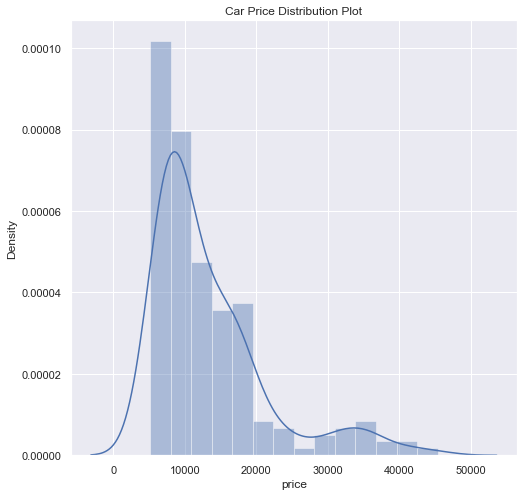

In [24]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(dataset['price'])

### Insights : 
The plots seems to be positive skewed(right skewed), the prices of almost all cars looks like less than 18000.


## 3.3 Visualising Numeric Variables

Pairplot of all the numeric variables

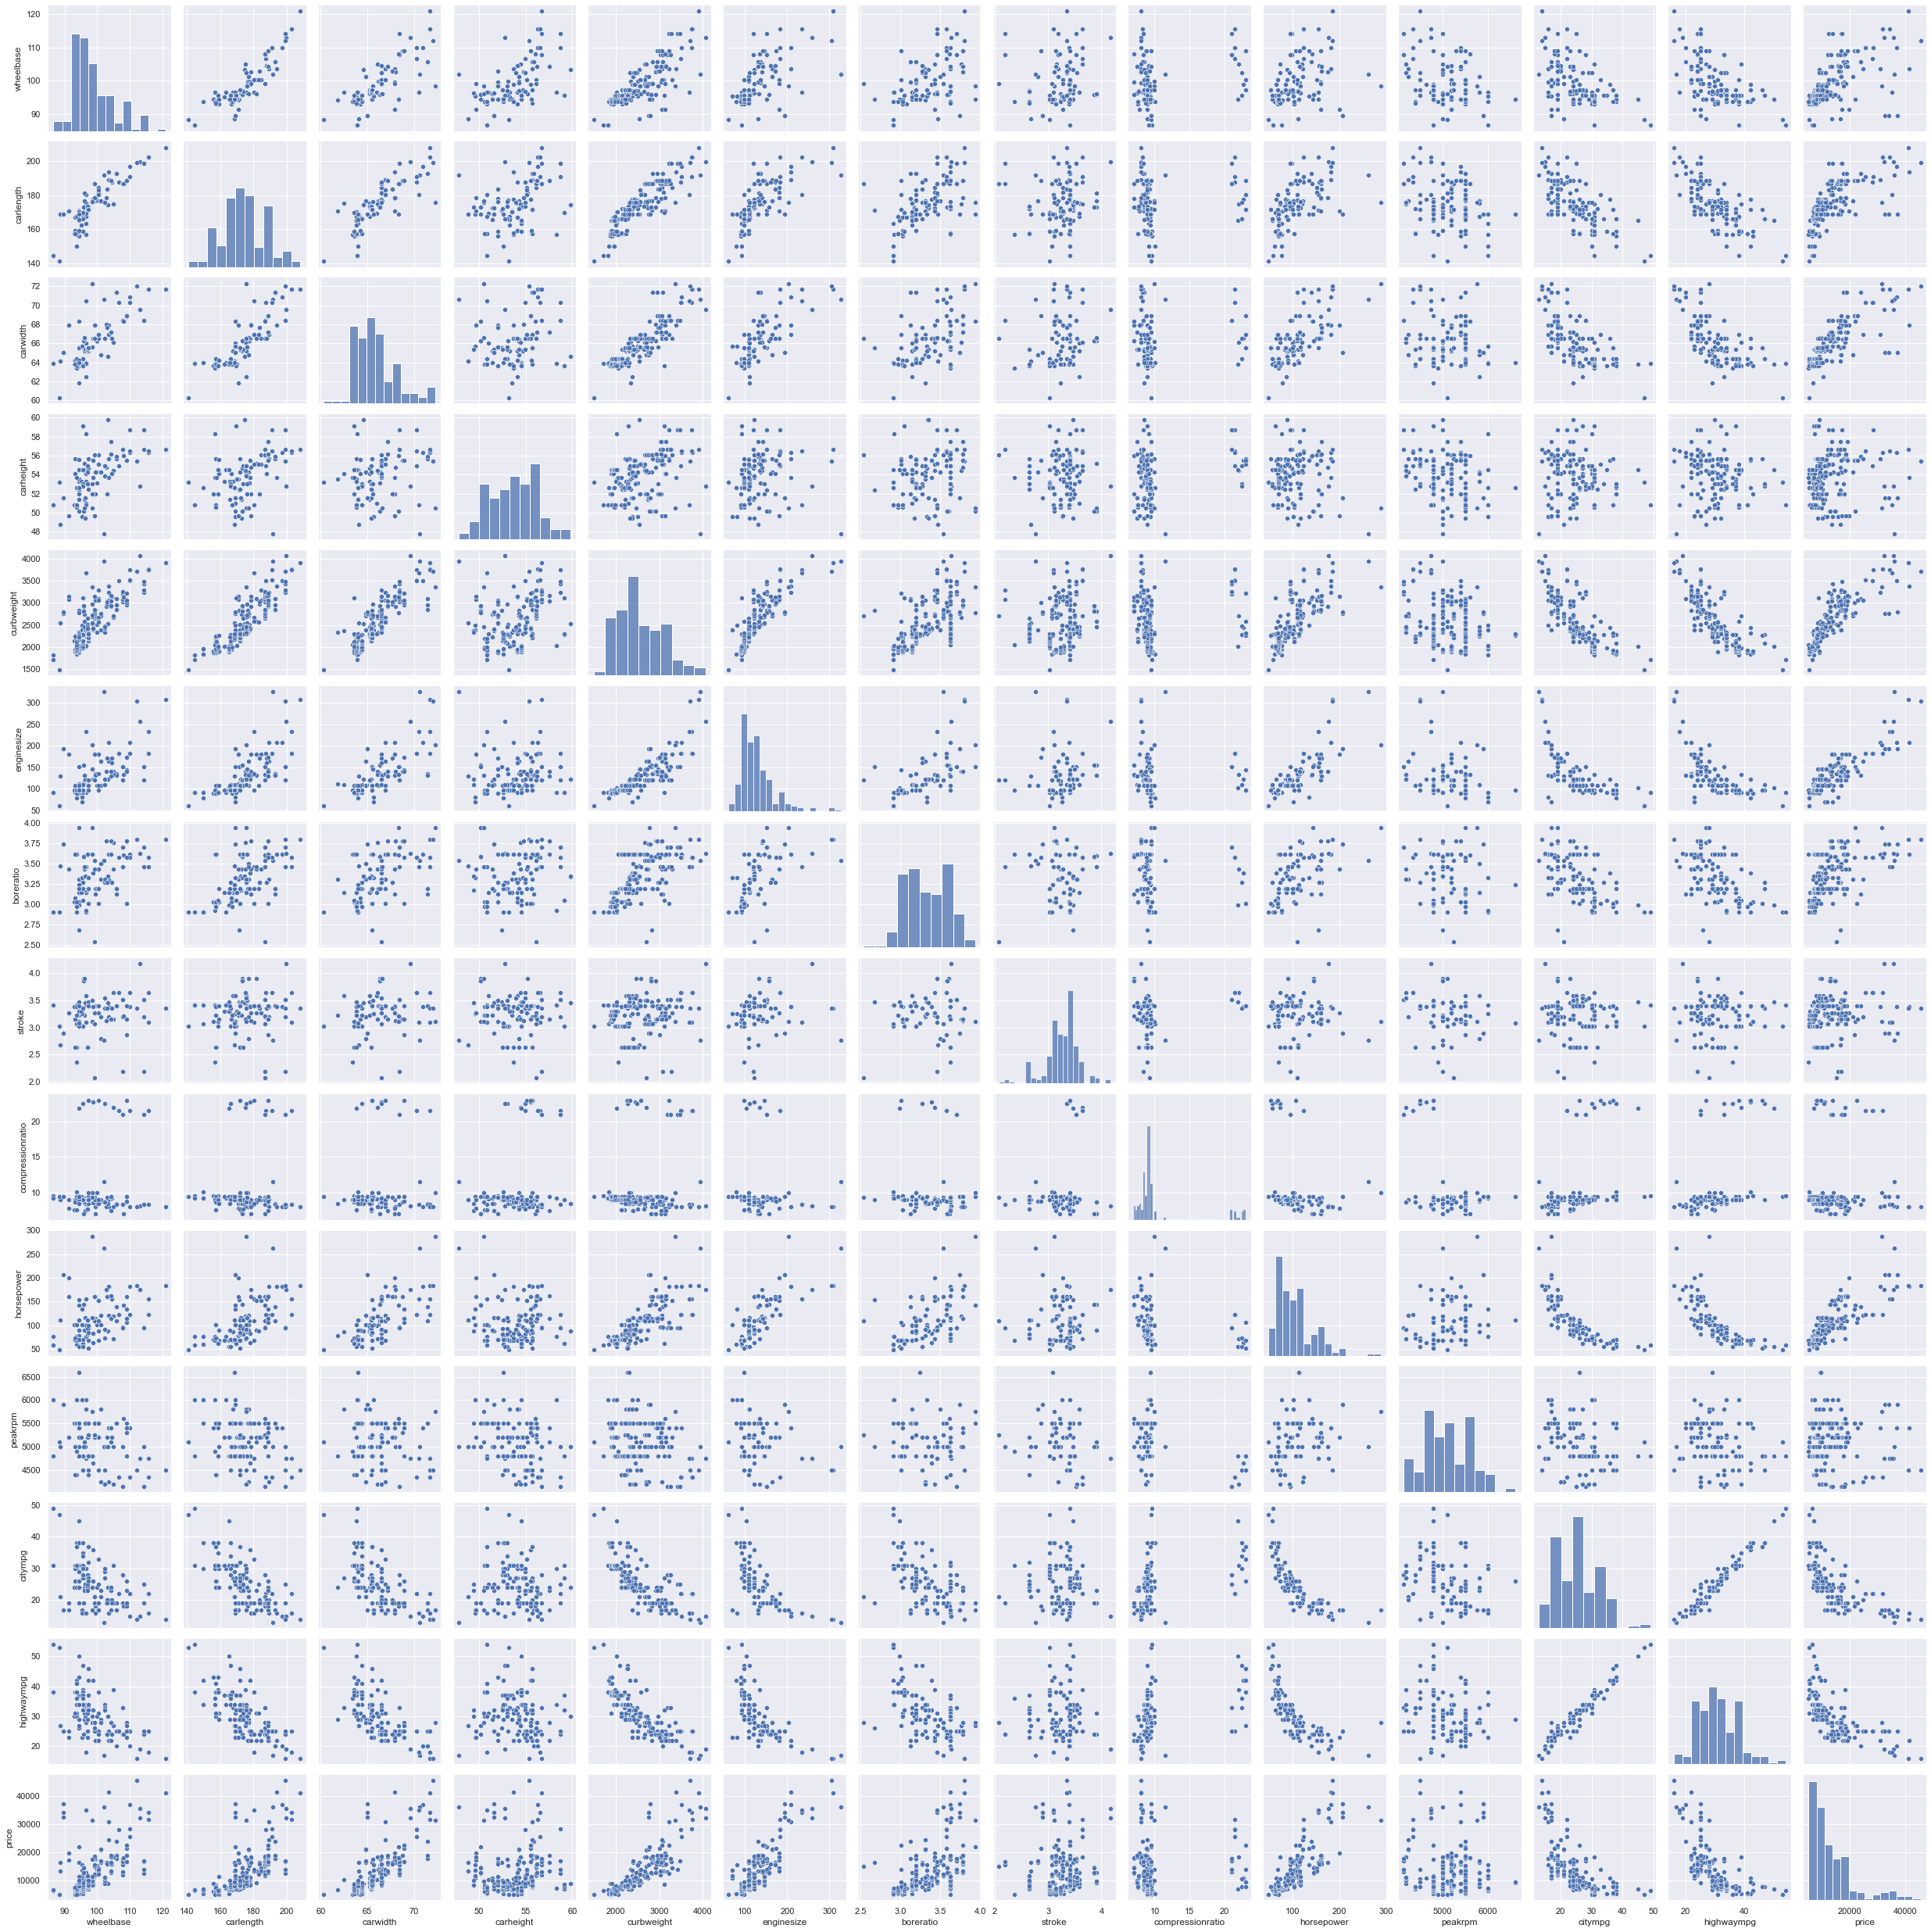

In [25]:
ax = sns.pairplot(dataset[num_col])

### Insights:
- `carwidth` , `carlength`, `curbweight` ,`enginesize` ,`horsepower`seems to have a poitive correlation with price.
- `carheight` doesn't show any significant trend with price.
- `citympg` , `highwaympg` - seem to have a significant negative correlation with price.

## 3.4 Visualising The Relation of few more Categorical Variables with 'Prices'

Boxplot of all the categorical variables

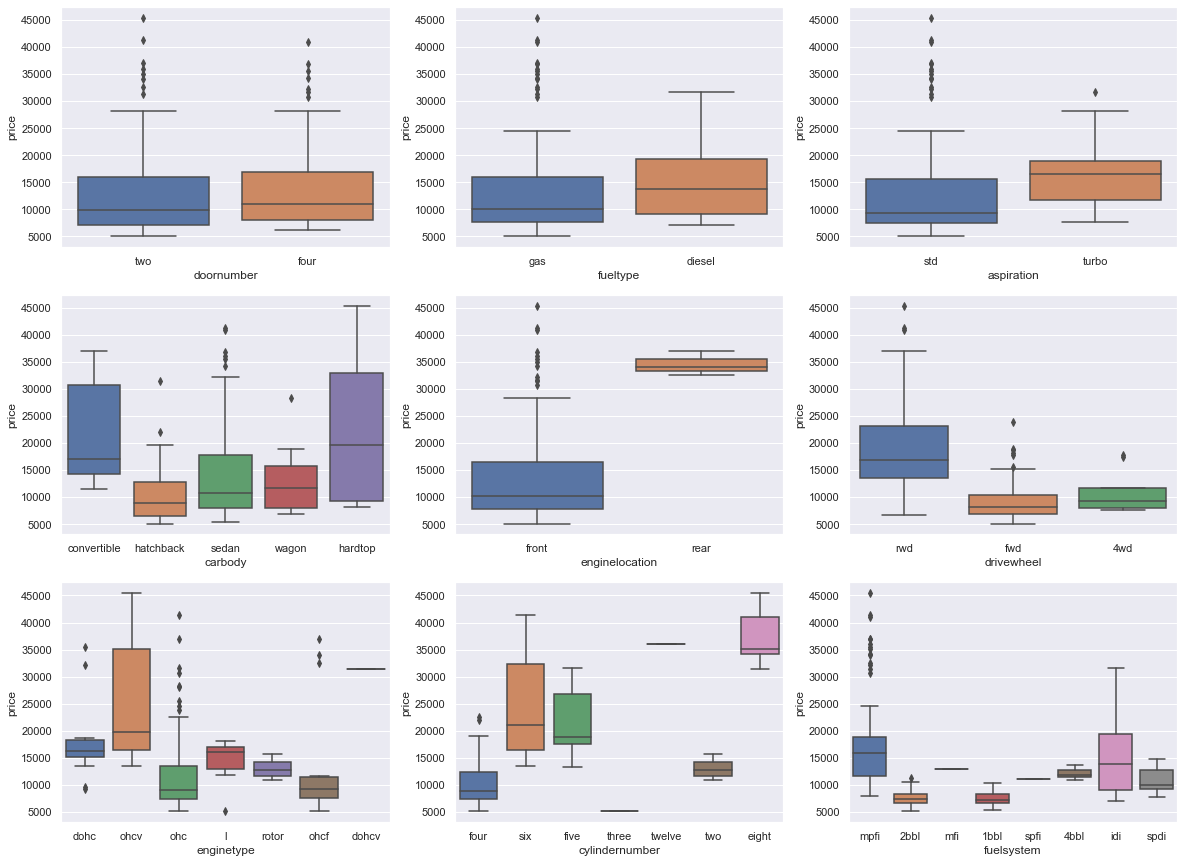

In [26]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = dataset)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = dataset)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = dataset)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = dataset)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = dataset)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = dataset)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = dataset)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = dataset)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = dataset)
plt.show()

### Insights 1 :
- `DoorNumber` isn't affecting the price much.
- The cars with `fueltype` as `diesel` are comparatively expensive than the cars with `fueltype` as `gas`.
- All the types of carbody is relatively cheaper as compared to `convertible` carbody.
- The cars with `rear enginelocation` are way expensive than cars with `front enginelocation`.
- HigerEnd cars seems to have `rwd` drivewheel
- Enginetype `ohcv` comes into higher price range cars.
- The price of car is directly proportional to `no. of cylinders` in most cases.



[Text(0.5, 0, 'Car Body Type'), Text(0, 0.5, 'Frequency of Car Body')]

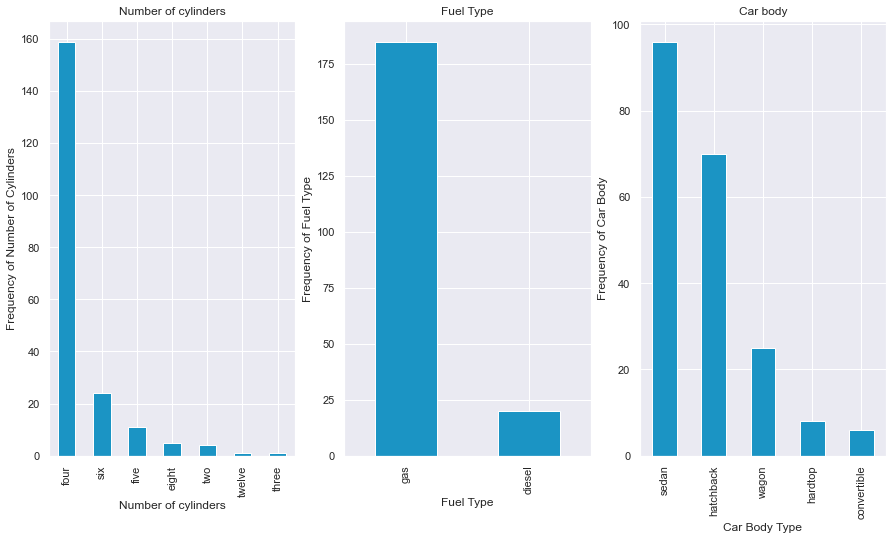

In [27]:
plt.figure(figsize=(15, 8))

plt.subplot(1,3,1)
plt1 = dataset['cylindernumber'].value_counts().plot(kind= 'bar',color='#1B94C4')

plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of Cylinders')

plt.subplot(1,3,2)
plt1 = dataset['fueltype'].value_counts().plot(kind= 'bar',color='#1B94C4')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel Type')

plt.subplot(1,3,3)
plt1 = dataset['carbody'].value_counts().plot(kind= 'bar',color='#1B94C4')
plt.title('Car body')
plt1.set(xlabel = 'Car Body Type', ylabel='Frequency of Car Body')

### Insights 2:
- The number of cylinders used in most cars is `four`.
- Number of `Gas` fueled cars are way more than `diesel` fueled cars.
- `Sedan` is the most prefered car type.

## 3.5 Visualizing The Relationship between 'fuelsystem' vs 'price' with hue 'fueltype'

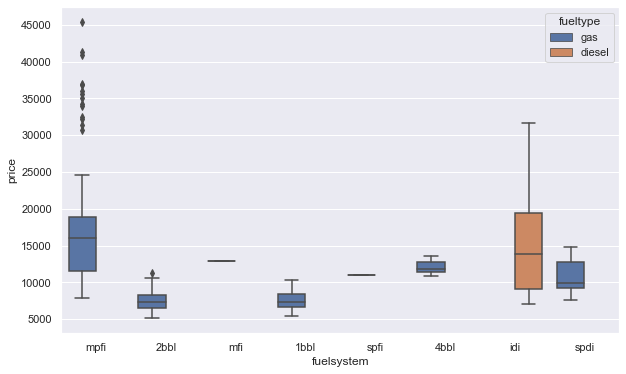

In [28]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = dataset)
plt.show()

## 3.6 Visualizing The Relationship between 'carbody' vs 'price' with hue 'enginelocation'

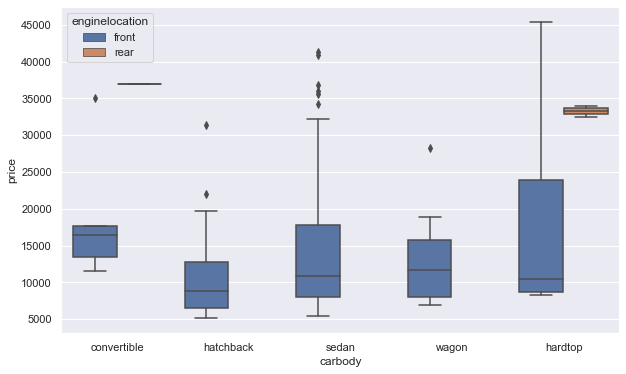

In [29]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = dataset)
plt.show()

## 3.7 Visualizing The Relationship between `cylindernumber` vs `price` with hue `fueltype`

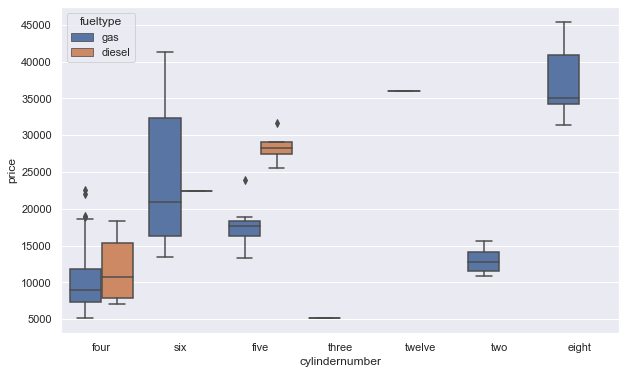

In [30]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = dataset)
plt.show()

## 3.8 Visualizing The Average Prices of Each American Cars

<Figure size 1440x432 with 0 Axes>

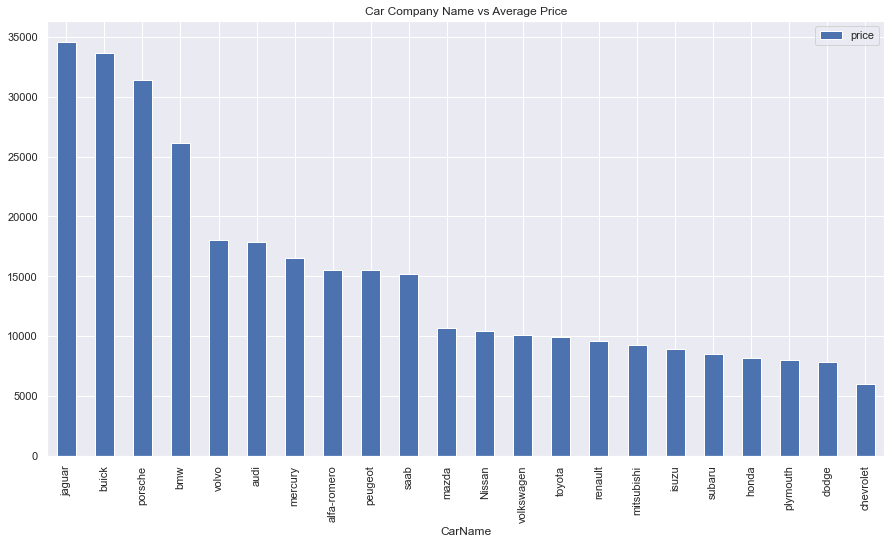

In [31]:
plt.figure(figsize=(20, 6))

dataset_ox = pd.DataFrame(dataset.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
dataset_ox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

#### Insights:
- `Jaguar`,`Buick` and `porsche` seems to have the highest average price.

## 3.9 Visualizing The Average Price of Carbody

<Figure size 1080x432 with 0 Axes>

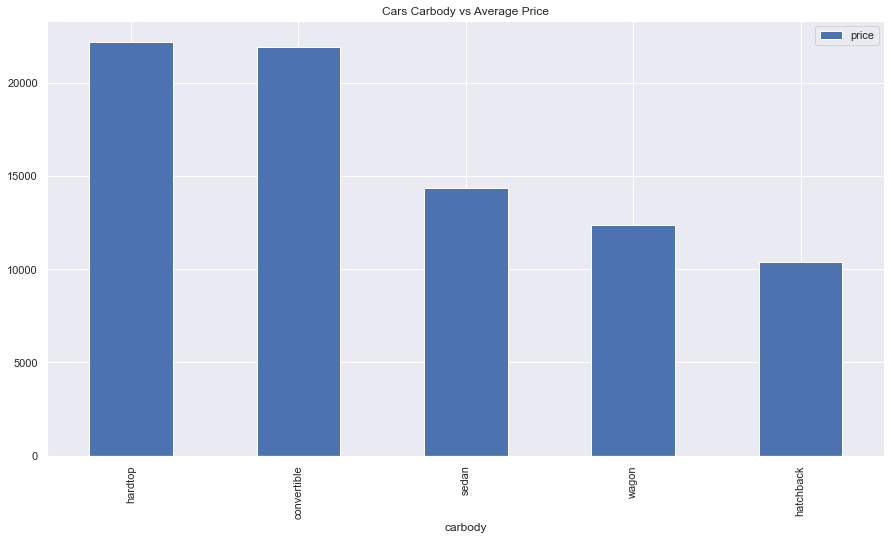

In [32]:
plt.figure(figsize=(15, 6))

dataset_oy = pd.DataFrame(dataset.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
dataset_oy.plot.bar()
plt.title('Cars Carbody vs Average Price')
plt.show()

#### Insights:
- `hardtop` and `convertible` seems to have the highest average price.

In [35]:
#Binning the Car Companies based on avg prices of each car Company.

dataset['price'] = dataset['price'].astype('int')
dataset_temp = dataset.copy()
t = dataset_temp.groupby(['CarName'])['price'].mean()
dataset_temp = dataset_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
dataset['Cars_Category'] = pd.cut(dataset_temp['price_y'],bins,right=False,labels=label)
dataset.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range


#### Significant variables after Visualization
- Cars_Category , Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number 
- Drivewheel , Curbweight , Car Length 
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base 
- citympg , highwaympg , symboling

In [36]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [37]:
dataset = dataset[sig_col]

<a id="4"></a> <br>
## Part 4: Data Preparation

<img src='https://res.cloudinary.com/talend/image/upload/f_auto/q_auto/v1633234205/resources/seo-articles/seo-what-is-data-preparation_jnd1rl.jpg' width='450'> 

#### Dummy Variables

The variable `carbody` has five levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric.

For this, we will use something called `dummy variables`.

In [38]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [39]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'

dummies = pd.get_dummies(dataset[sig_cat_col])
dummies.shape

(205, 29)

In [40]:
dummies = pd.get_dummies(dataset[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [41]:
# Add the results to the original dataframe

dataset = pd.concat([dataset, dummies], axis = 1)

In [42]:
# Drop the original cat variables as dummies are already created

dataset.drop( sig_cat_col, axis = 1, inplace = True)
dataset.shape

(205, 32)

<a id="5"></a> <br>
## Part 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

<img src='https://miro.medium.com/max/1400/1*Xa1_gnLz8Pg6EfKwR3jz1A.jpeg' width='450'> 

In [43]:
dataset

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1000,2952,141,3.7800,114,23,28,188.8000,68.9000,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
201,19045,109.1000,3049,141,3.7800,160,19,25,188.8000,68.8000,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
202,21485,109.1000,3012,173,3.5800,134,18,23,188.8000,68.9000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
203,22470,109.1000,3217,145,3.0100,106,26,27,188.8000,68.9000,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [44]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,7609,93.7000,2191,98,2.9700,68,31,38,167.3000,63.8000,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,22018,94.5000,2778,151,3.9400,143,19,27,168.9000,68.3000,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,9538,94.5000,2300,98,3.2400,112,26,29,168.7000,64.0000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,18950,104.3000,3157,130,3.6200,162,17,22,188.8000,67.2000,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [46]:
scaler = preprocessing.StandardScaler()

In [47]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [48]:
# Apply scaler() to all the columns except the 'dummy' variables
import warnings
warnings.filterwarnings("ignore")

df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [49]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.7002,-0.8118,-0.6421,-0.6602,-1.2973,-0.8729,0.8398,1.0254,-0.4872,-0.9245,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,1.1519,-0.6772,0.4394,0.6378,2.4323,1.0218,-0.9570,-0.5575,-0.3598,1.1150,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.4522,-0.6772,-0.4413,-0.6602,-0.2592,0.2387,0.0911,-0.2697,-0.3757,-0.8339,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.4426,-1.6703,0.0156,0.1235,0.6251,0.2134,-0.6576,-0.5575,-0.3678,-0.7885,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.7576,0.9724,1.1377,0.1235,1.2019,1.5018,-1.2565,-1.2770,1.2254,0.6164,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


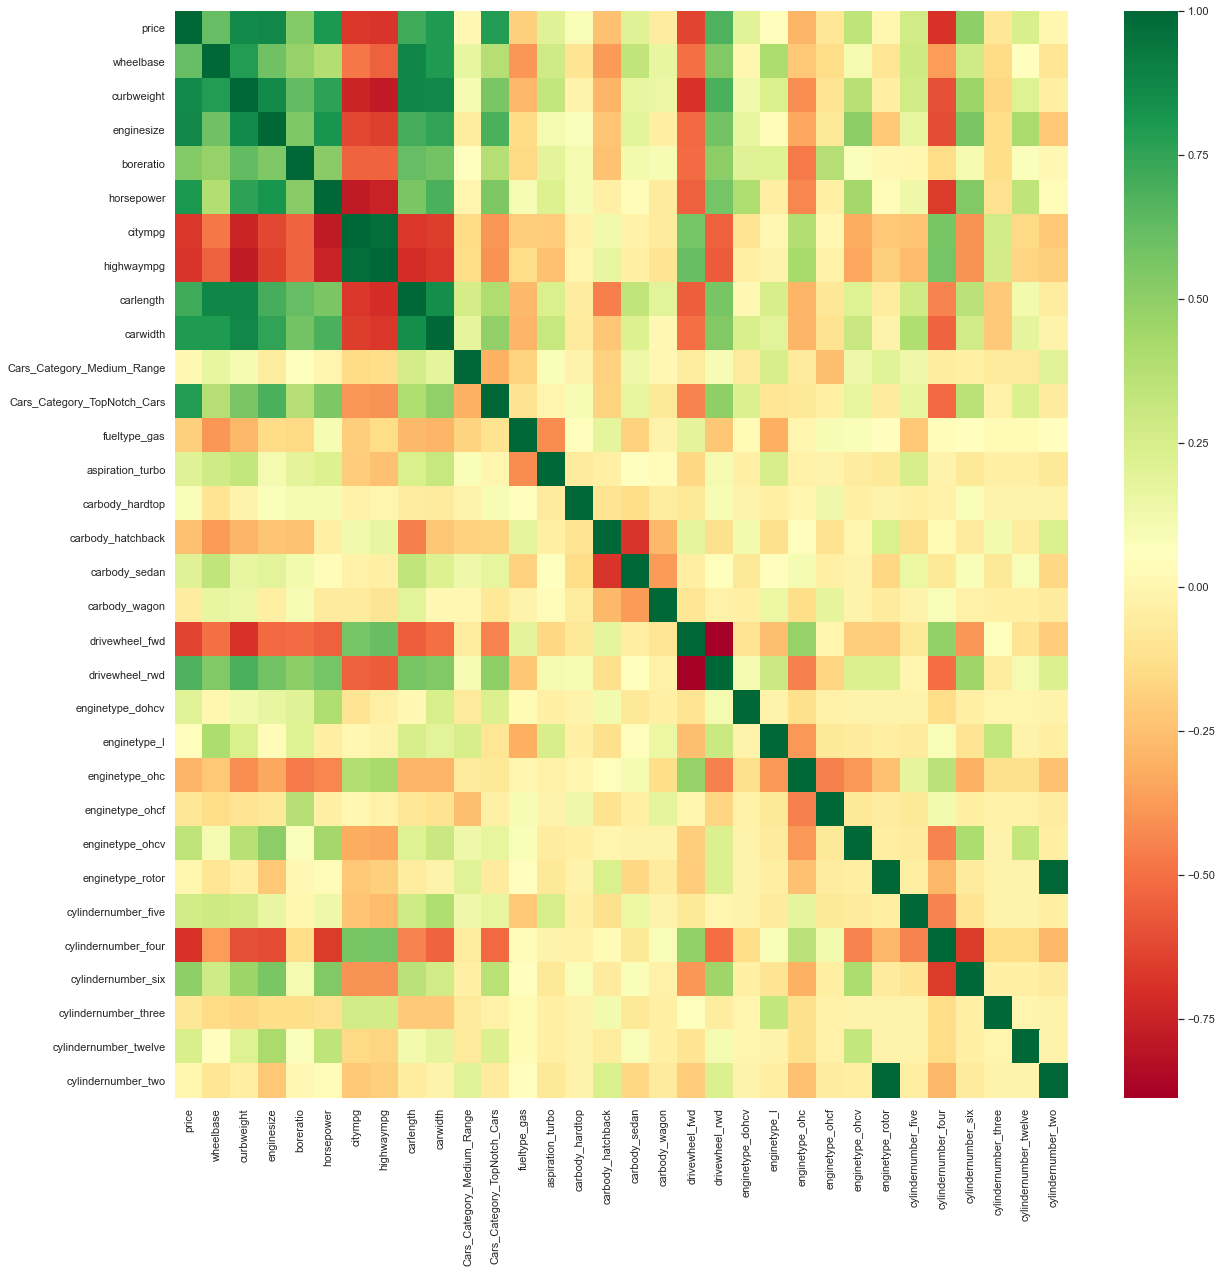

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

### Dividing into X and Y sets for the model building

In [54]:
y_train = df_train.pop('price')
X_train = df_train

<a id="6"></a> <br>
## Part 6: Building a Linear Model

https://miro.medium.com/max/1200/1*N1-K-A43_98pYZ27fnupDA.jpeg

In [55]:
X_train_1 = X_train['horsepower']

In [56]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [57]:
# Check parameters created

lr_1.params

const        0.0000
horsepower   0.8062
dtype: float64

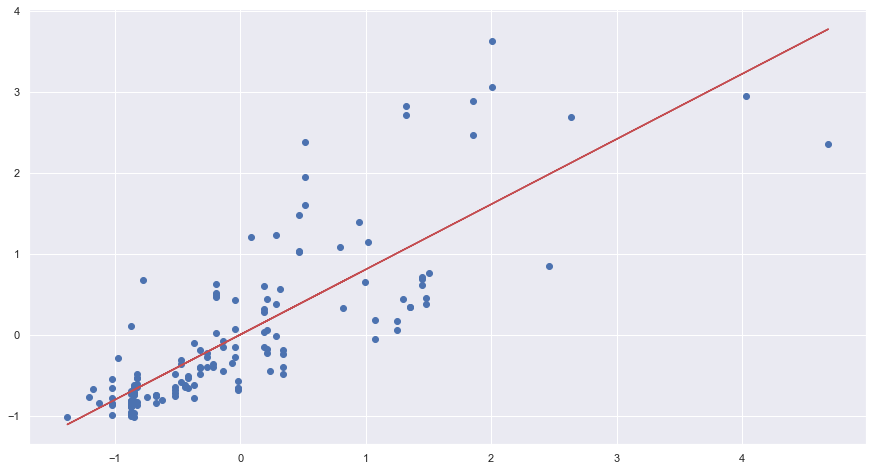

In [58]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [59]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           6.05e-34
Time:                        12:59:14   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.050   1.74e-15      1.0

### Adding another variable

The R-squared value obtained is `0.65`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. `curbweight`.

In [60]:
X_train_2 = X_train[['horsepower', 'curbweight']]

In [61]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [62]:
lr_2.params

const        0.0000
horsepower   0.3581
curbweight   0.5898
dtype: float64

In [63]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.34e-49
Time:                        12:59:27   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.038   2.28e-15      1.0

* The R-squared incresed from 0.650 to 0.797 

### Adding another variable

The R-squared value obtained is `0.797`. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. `enginesize`.

In [64]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

In [65]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [66]:
lr_3.params

const        0.0000
horsepower   0.2288
curbweight   0.3938
enginesize   0.3400
dtype: float64

In [67]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.16e-51
Time:                        12:59:38   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e-17      0.036    2.5e-15      1.0

We have achieved a R-squared of `0.819` by manually picking the highly correlated variables.
Now lets use RFE to select the independent variables which accurately predicts the dependent variable `price`.

### RFE
Let's use Recursive feature elimination since we have too many independent variables

In [68]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 3),
 ('boreratio', False, 3),
 ('horsepower', True, 1),
 ('citympg', False, 3),
 ('highwaympg', False, 3),
 ('carlength', False, 3),
 ('carwidth', False, 3),
 ('Cars_Category_Medium_Range', False, 2),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 3),
 ('aspiration_turbo', False, 3),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 3),
 ('drivewheel_rwd', False, 3),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 3),
 ('enginetype_rotor', False, 3),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 3)]

In [70]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve'],
      dtype='object')

In [71]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

In [72]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     110.5
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.38e-65
Time:                        13:00:29   Log-Likelihood:                -13.974
No. Observations:                 143   AIC:                             59.95
Df Residuals:                     127   BIC:                             107.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)<br>
and we need to drop it

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

 $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_four,19.0100
8,enginetype_ohc,11.6000
5,carbody_sedan,10.4100
4,carbody_hatchback,6.6400
1,horsepower,5.6600
0,curbweight,5.2200
12,cylindernumber_six,4.3900
6,carbody_wagon,3.9000
10,cylindernumber_five,3.2100
2,Cars_Category_TopNotch_Cars,2.4900


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

*Dropping `cylindernumber_three` beacuse its `p-value` is `0.532` and we want p-value less than 0.05 and hence rebuilding the model*

In [74]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('cylindernumber_three', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     118.9
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           3.69e-66
Time:                        13:00:47   Log-Likelihood:                -14.195
No. Observations:                 143   AIC:                             58.39
Df Residuals:                     128   BIC:                             102.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_four,18.3500
8,enginetype_ohc,11.0900
5,carbody_sedan,9.3800
4,carbody_hatchback,5.8500
1,horsepower,5.6100
0,curbweight,5.0400
12,cylindernumber_six,4.3300
6,carbody_wagon,3.5600
10,cylindernumber_five,3.2100
2,Cars_Category_TopNotch_Cars,2.4500


*Dropping `cylindernumber_twelve` beacuse its `p-value` is `0.129` and we want p-value less than 0.05 and hence rebuilding the model*

In [76]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     126.5
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.02e-66
Time:                        13:01:05   Log-Likelihood:                -15.490
No. Observations:                 143   AIC:                             58.98
Df Residuals:                     129   BIC:                             100.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_four,17.7800
8,enginetype_ohc,11.0900
5,carbody_sedan,8.5700
4,carbody_hatchback,5.5600
0,curbweight,4.9300
1,horsepower,4.5200
12,cylindernumber_six,3.5300
6,carbody_wagon,3.3200
10,cylindernumber_five,3.0200
2,Cars_Category_TopNotch_Cars,2.4100


*Dropping `carbody_hardtop` beacuse its `p-value` is `0.365` and we want p-value less than 0.05 and hence rebuilding the model*

In [78]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     137.2
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.28e-67
Time:                        13:01:17   Log-Likelihood:                -15.946
No. Observations:                 143   AIC:                             57.89
Df Residuals:                     130   BIC:                             96.41
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,cylindernumber_four,15.5700
7,enginetype_ohc,10.9800
4,carbody_sedan,6.5500
0,curbweight,4.8800
1,horsepower,4.3600
3,carbody_hatchback,4.3000
11,cylindernumber_six,3.1500
9,cylindernumber_five,2.8800
5,carbody_wagon,2.8100
2,Cars_Category_TopNotch_Cars,2.3800


*Dropping `enginetype_dohcv` beacuse its `p-value` is `0.226` and we want p-value less than 0.05 and hence rebuilding the model*

In [80]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('enginetype_dohcv', 1,)

# Adding a constant variable and Build a fifth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     149.0
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.12e-68
Time:                        13:01:28   Log-Likelihood:                -16.756
No. Observations:                 143   AIC:                             57.51
Df Residuals:                     131   BIC:                             93.07
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,cylindernumber_four,15.5100
6,enginetype_ohc,10.9500
4,carbody_sedan,6.3600
0,curbweight,4.5400
3,carbody_hatchback,4.1700
1,horsepower,3.3500
8,cylindernumber_five,2.8600
10,cylindernumber_six,2.8500
5,carbody_wagon,2.6900
2,Cars_Category_TopNotch_Cars,2.3300


*Dropping `cylindernumber_five` beacuse its `p-value` is `0.126` and we want p-value less than 0.05 and hence rebuilding the model*

In [82]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     162.0
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           5.20e-69
Time:                        13:01:37   Log-Likelihood:                -18.038
No. Observations:                 143   AIC:                             58.08
Df Residuals:                     132   BIC:                             90.67
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,cylindernumber_four,7.5800
6,enginetype_ohc,6.8400
4,carbody_sedan,5.2600
0,curbweight,3.7900
3,carbody_hatchback,3.4700
1,horsepower,3.3300
5,carbody_wagon,2.4500
2,Cars_Category_TopNotch_Cars,2.1600
9,cylindernumber_six,1.9500
7,enginetype_ohcf,1.8100


*Dropping `enginetype_ohcf` beacuse its `p-value` is `0.424` and we want p-value less than 0.05 and hence rebuilding the model*

In [84]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('enginetype_ohcf', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     180.4
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           5.17e-70
Time:                        13:01:49   Log-Likelihood:                -18.386
No. Observations:                 143   AIC:                             56.77
Df Residuals:                     133   BIC:                             86.40
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,6.8900
4,carbody_sedan,4.8900
6,enginetype_ohc,4.5200
3,carbody_hatchback,3.4000
0,curbweight,3.3800
1,horsepower,3.3200
5,carbody_wagon,2.2200
2,Cars_Category_TopNotch_Cars,1.9800
8,cylindernumber_six,1.9500


*Dropping `cylindernumber_four` beacuse its `VIF` is `6.89` and we want VIF less than 5 and hence rebuilding the model*

In [86]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     185.6
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.34e-68
Time:                        13:01:57   Log-Likelihood:                -24.761
No. Observations:                 143   AIC:                             67.52
Df Residuals:                     134   BIC:                             94.19
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_ohc,4.2800
0,curbweight,3.3000
1,horsepower,3.3000
4,carbody_sedan,2.8000
3,carbody_hatchback,2.1300
2,Cars_Category_TopNotch_Cars,1.9500
7,cylindernumber_six,1.6700
5,carbody_wagon,1.3800


*Dropping `cylindernumber_six` beacuse its `P-value` is `0.268` we want p-value less than 0.05 and hence rebuilding the model*

In [88]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe8 = X_train_rfe7.drop('cylindernumber_six', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     211.6
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.64e-69
Time:                        13:02:08   Log-Likelihood:                -25.418
No. Observations:                 143   AIC:                             66.84
Df Residuals:                     135   BIC:                             90.54
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_ohc,4.2200
0,curbweight,3.3000
1,horsepower,3.0600
4,carbody_sedan,2.5700
3,carbody_hatchback,2.0100
2,Cars_Category_TopNotch_Cars,1.9200
5,carbody_wagon,1.3300


Lets drop `carbody_sedan` and see if there is any drastic fall in R squared.If not we can drop `carbody sedan`.
Our aim is to explain the maximum variance with minimum variable.

In [90]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe9 = X_train_rfe8.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     238.8
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.21e-69
Time:                        13:02:21   Log-Likelihood:                -28.052
No. Observations:                 143   AIC:                             70.10
Df Residuals:                     136   BIC:                             90.84
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The R squared value just dropped by `0.003`.Hence we can proceed with dropping `carbody_sedan`.

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,3.1600
1,horsepower,3.0600
5,enginetype_ohc,1.9800
2,Cars_Category_TopNotch_Cars,1.9200
3,carbody_hatchback,1.5600
4,carbody_wagon,1.1800


*Dropping `enginetype_ohc` because its `p-value` is `0.470` and we want p-value less than 0.05 and hence rebuilding the model*

In [92]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe10 = X_train_rfe9.drop('enginetype_ohc', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe10c = sm.add_constant(X_train_rfe10)
lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           8.81e-71
Time:                        13:02:41   Log-Likelihood:                -28.327
No. Observations:                 143   AIC:                             68.65
Df Residuals:                     137   BIC:                             86.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,3.1400
1,horsepower,2.7900
2,Cars_Category_TopNotch_Cars,1.5100
3,carbody_hatchback,1.1800
4,carbody_wagon,1.1000


*Dropping `carbody_hatchback` because its `p-value` is `0.019` and we want p-value less than 0.05 and hence rebuilding the model*

In [94]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe11 = X_train_rfe10.drop('carbody_hatchback', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe11c = sm.add_constant(X_train_rfe11)
lm_rfe11 = sm.OLS(y_train, X_train_rfe11c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           8.81e-71
Time:                        13:02:49   Log-Likelihood:                -28.327
No. Observations:                 143   AIC:                             68.65
Df Residuals:                     137   BIC:                             86.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe11.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe11.values, i) for i in range(X_train_rfe11.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,2.6900
1,horsepower,2.6500
2,Cars_Category_TopNotch_Cars,1.4500
3,carbody_wagon,1.0900


Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model `lm_rfe11`.

Here, we are proposing Business 1 Model which can be used to predict the car prices.

## Linear Model
- With `lm_rfe11` which has basically 4 predictor variables.

<a id="7"></a> <br>
## Part 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [96]:
# Predicting the price of training set.
y_train_price = lm_rfe11.predict(X_train_rfe11c)

Text(0.5, 0, 'Errors')

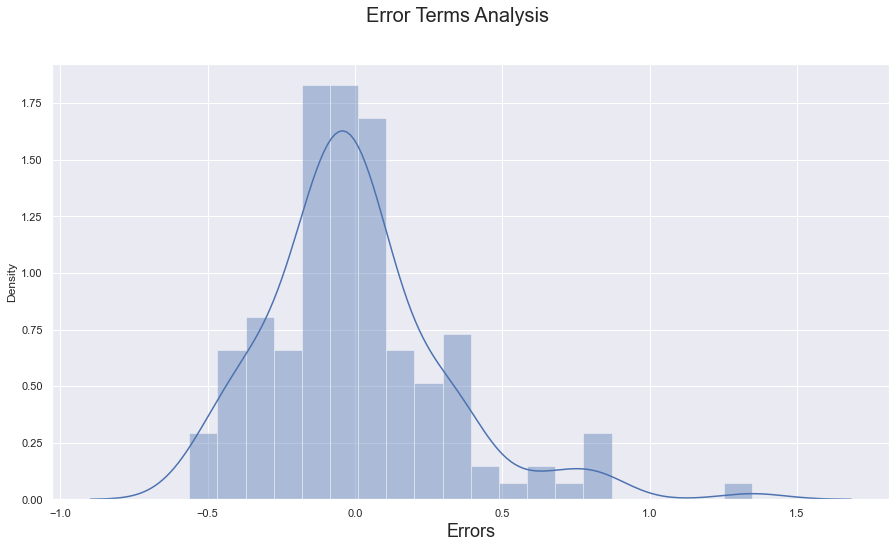

In [97]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

<a id="8"></a> <br>
## Part 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

**Because we just scaling the train data only, now we need to scaling the test set data too**.

In [98]:
import warnings
warnings.filterwarnings("ignore")

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

#### Dividing test set into X_test and y_test

In [99]:
y_test = df_test.pop('price')
X_test = df_test

In [100]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe11c.columns]

In [101]:
# Making predictions using the final model
y_pred = lm_rfe11.predict(X_test_new)

<a id="9"></a> <br>
## Part 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

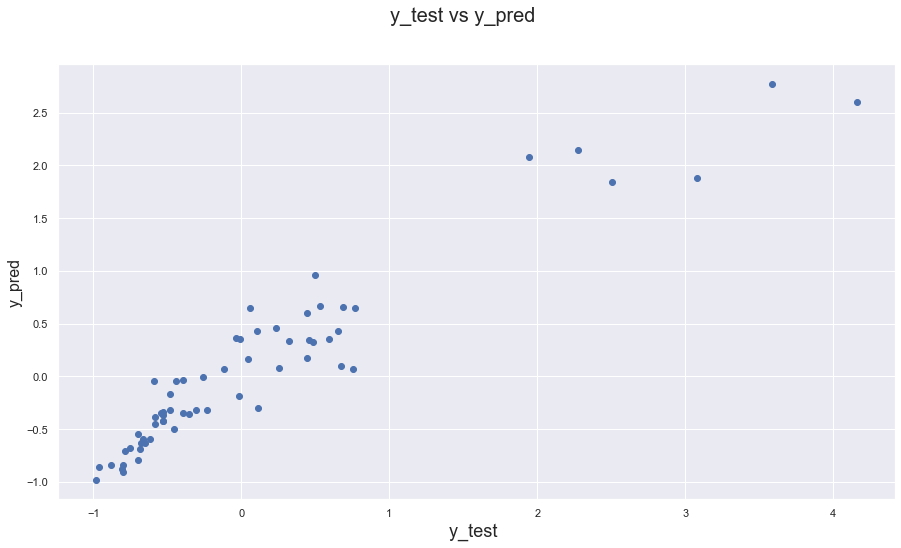

In [102]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

### RMSE Score

In [103]:
r2_score(y_test, y_pred)

0.8824458345094044

**The R2 score of Training set is 0.913 and Test set is 0.882 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**
- curbweight
- horsepower	
- Cars_Category_TopNotch_Cars
- carbody_wagon

### Final Equation of Line to predict the Car prices values

$ Carprice = -0.1137 +  0.4961  \times  curbweight  + 0.2062  \times  horsepower +  1.2154 \times CarsCategoryTopNotchCars  - 0.2317 \times CarbodyWagon $

#### Linear Model Conclusions:
- R-sqaured and Adjusted R-squared - 0.909 and 0.907 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 284.8 and 1.57e-70(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

### Closing Statement:
So, This finishes our project.The model is good enough to predict the carprices which explains the variance of data upto 90% and the model is significant. We have built a linear regression model that performs reasonably well given the 4 features. But should the model should be used in a real-world setting? It probably shouldn't because: 

- The data collected in before 2000 is not really relevant today due to the possibility of material of old cars and present are different, it may cause differences in price.
- The features present in the data that we built our model on are not likely be sufficient to describe newest cars. Examples of interesting features to look at may be *Rarity* some classic cars maybe can get higher prices.  